In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-5000-movie-dataset/movie_metadata.csv


# EDA(ОБЗОР ДАТАСЕТА)

In [2]:
df = pd.read_csv('/kaggle/input/imdb-5000-movie-dataset/movie_metadata.csv')

In [3]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
# Количество пропусков в каждом столбце
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

# Работа с данными

* Удаление столбцов

In [6]:
df = df.drop(columns=[
    'color', 'director_facebook_likes', 'actor_1_facebook_likes',
    'actor_2_facebook_likes', 'actor_3_facebook_likes',
    'cast_total_facebook_likes', 'movie_facebook_likes',
    'movie_title', 'movie_imdb_link','facenumber_in_poster'
])

* *Удаление строк с пропуском больше двух NAN значений и подсчет потери данных*

In [7]:
initial_rows = df.shape[0]  
print(f"Количество строк до удаления: {initial_rows}")

for index, row in df.iterrows():
    if row.isna().sum() > 2:
        df.drop(index, inplace=True)

final_rows = df.shape[0]  
print(f"Количество строк после удаления: {final_rows}")
print(f"Удалено строк: {initial_rows - final_rows}")

Количество строк до удаления: 5043
Количество строк после удаления: 4730
Удалено строк: 313


*Frequency Encoding,количество появления режисера*

In [8]:
director_counts = df['director_name'].value_counts()
df['director_freq'] = df['director_name'].map(director_counts)
df.drop(columns=['director_name'], inplace=True)

In [9]:
df.head()

,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,num_voted_users,actor_3_name,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,director_freq
0,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,Wes Studi,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78,7
1,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35,7
2,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35,8
3,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,1144337,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35,8
5,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,Polly Walker,alien|american civil war|male nipple|mars|prin...,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,2.35,3


# Обработка данных

In [10]:
info = df.describe(include='all')
info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,num_voted_users,actor_3_name,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,director_freq
count,4726.000000,4729.000000,4729,4.136000e+03,4730,4730,4.730000e+03,4723,4683,4730.000000,4722,4730,4618,4.421000e+03,4730.000000,4730.000000,4575.000000,4730.000000
unique,NaN,NaN,2808,NaN,876,1915,NaN,3290,4562,NaN,39,57,15,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Morgan Freeman,NaN,Drama,Robert De Niro,NaN,Steve Coogan,assistant|experiment|frankenstein|medical stud...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,NaN,214,48,NaN,8,3,NaN,4444,3606,2102,NaN,NaN,NaN,NaN,NaN
mean,147.152983,108.684500,NaN,4.873686e+07,NaN,NaN,8.849411e+04,NaN,NaN,287.216913,NaN,NaN,NaN,4.076216e+07,2002.104651,6.434123,2.115497,4.429175
std,121.220815,22.451966,NaN,6.854809e+07,NaN,NaN,1.414777e+05,NaN,NaN,384.402480,NaN,NaN,NaN,2.090214e+08,12.511844,1.097783,0.646110,4.257288
min,1.000000,20.000000,NaN,1.620000e+02,NaN,NaN,5.000000e+00,NaN,NaN,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,1.600000,1.180000,1.000000
25%,59.000000,94.000000,NaN,5.539594e+06,NaN,NaN,1.113600e+04,NaN,NaN,76.000000,NaN,NaN,NaN,7.000000e+06,1999.000000,5.800000,1.850000,1.000000
50%,118.000000,104.000000,NaN,2.567678e+07,NaN,NaN,3.850800e+04,NaN,NaN,169.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,6.600000,2.350000,3.000000
75%,202.000000,118.000000,NaN,6.255264e+07,NaN,NaN,1.026305e+05,NaN,NaN,342.750000,NaN,NaN,NaN,4.500000e+07,2010.000000,7.200000,2.350000,6.000000


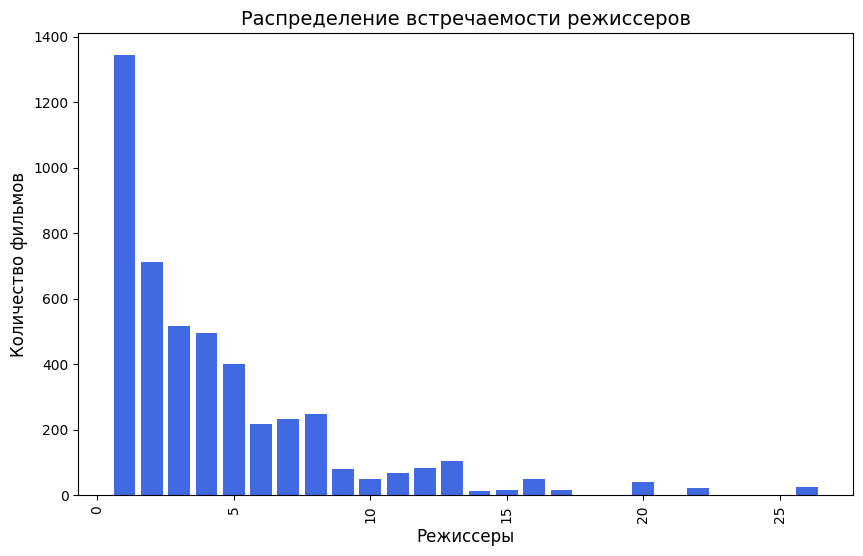

In [11]:
director_counts = df['director_freq'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(director_counts.index, director_counts.values, color='royalblue')
plt.ylabel("Количество фильмов", fontsize=12)
plt.xlabel("Режиссеры", fontsize=12)
plt.title("Распределение встречаемости режиссеров", fontsize=14)

plt.xticks(rotation=90)
plt.show()

* Экспоненциальное распределение(убрал хвост)

In [12]:
df['director_freq'] = np.log(df['director_freq'])

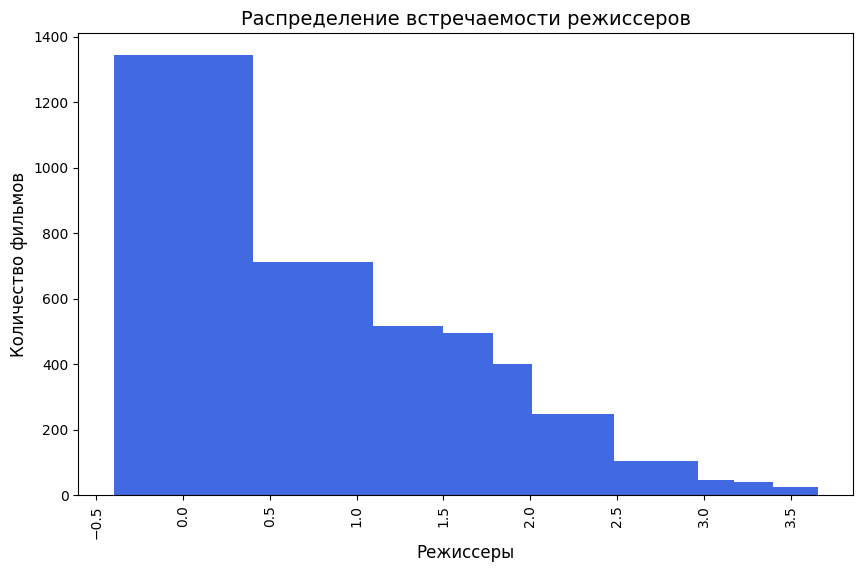

In [13]:
director_counts = df['director_freq'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(director_counts.index, director_counts.values, color='royalblue')
plt.ylabel("Количество фильмов", fontsize=12)
plt.xlabel("Режиссеры", fontsize=12)
plt.title("Распределение встречаемости режиссеров", fontsize=14)

plt.xticks(rotation=90)
plt.show()

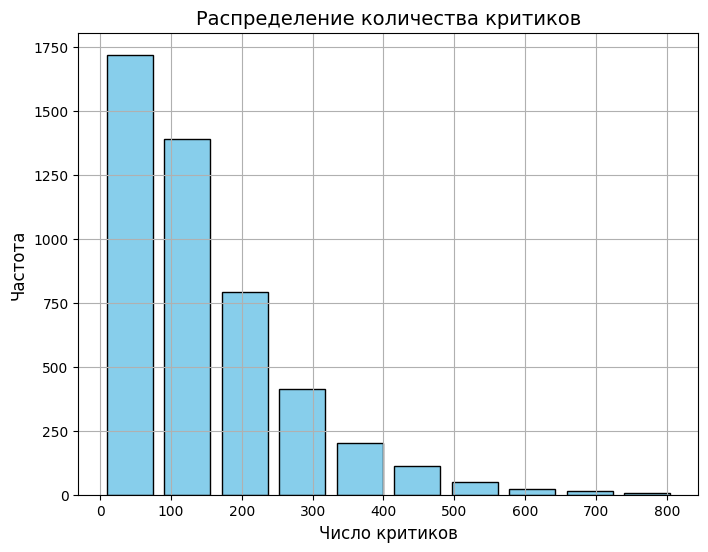

In [14]:
plt.figure(figsize=(8, 6))
df['num_critic_for_reviews'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black', rwidth=0.8)

plt.title('Распределение количества критиков', fontsize=14)
plt.xlabel('Число критиков', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True)
plt.show()